<center><img src="football.jpg" width=500></center>

The Super Bowl is a spectacle. It is the final game in the NFL that crowns the winner of that season. There is always a little something for everyone. For the fans, there is the game itself. For those tagging along, there are the unique advertisements and the halftime shows with the biggest musicians in the world.

You're going to explore how these elements interact.

## The Data
The data has been scraped from Wikipedia and is made up of two CSV files covering a span of all Super Bowls up to 2024. This data does contain missing values. The most relevant columns are noted below.  
`data/tv.csv`  
|Column|Description|
|------|-----------|
|`super_bowl`|Super Bowl number (e.g. the first Super Bowl ever is Super Bowl 1 and the last Super Bowl in 2024 is Super Bowl 58)|
|`avg_us_viewers`|Average # of US viewers|
|`share_household`|Percentage of households watching TV that watched the game|
|`rating_household`|Percentage of all households with TVs that watched the game|
|`ad_cost`|Cost per ad|
---
`data/super_bowls.csv`  
|Column|Description|
|------|-----------|
|`super_bowl`|Super Bowl number (e.g. the first Super Bowl ever is Super Bowl 1 and the last Super Bowl in 2024 is Super Bowl 58)|
|`difference_pts`|Point difference for that game|

Understand how Super Bowl scores, viewership, and advertisements interact with each other by answering the following questions:

- Do large point differences result in lost viewers across super bowl games? Visualize and interpret the data, storing your string answer to `score_impact` (either "strong", "weak", or "none").

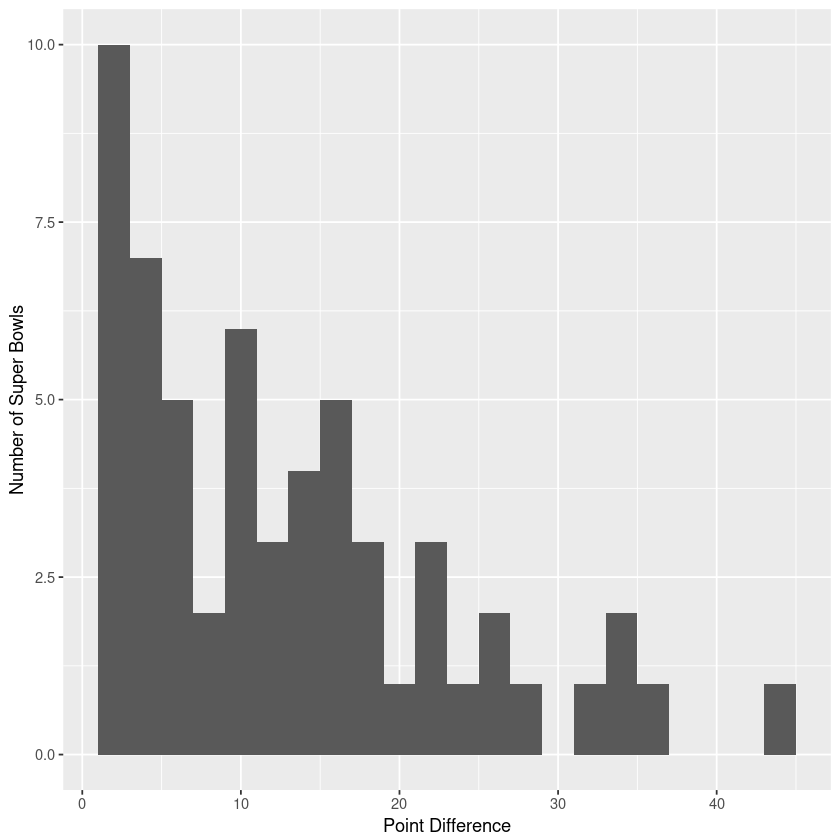

In [6]:
library(tidyverse)

tv  <-  read_csv("data/tv.csv", show_col_types=FALSE)
super_bowls  <-  read_csv("data/super_bowls.csv", show_col_types=FALSE)

ggplot(super_bowls, aes(difference_pts)) +
 geom_histogram(binwidth = 2) +
 labs(x = "Point Difference", y = "Number of Super Bowls")

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NA,Bill Parcells,Buffalo Bills,19,Jim Kelly,NA,Marv Levy,39,1
1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NA,George Seifert,Denver Broncos,10,John Elway,NA,Dan Reeves,65,45


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


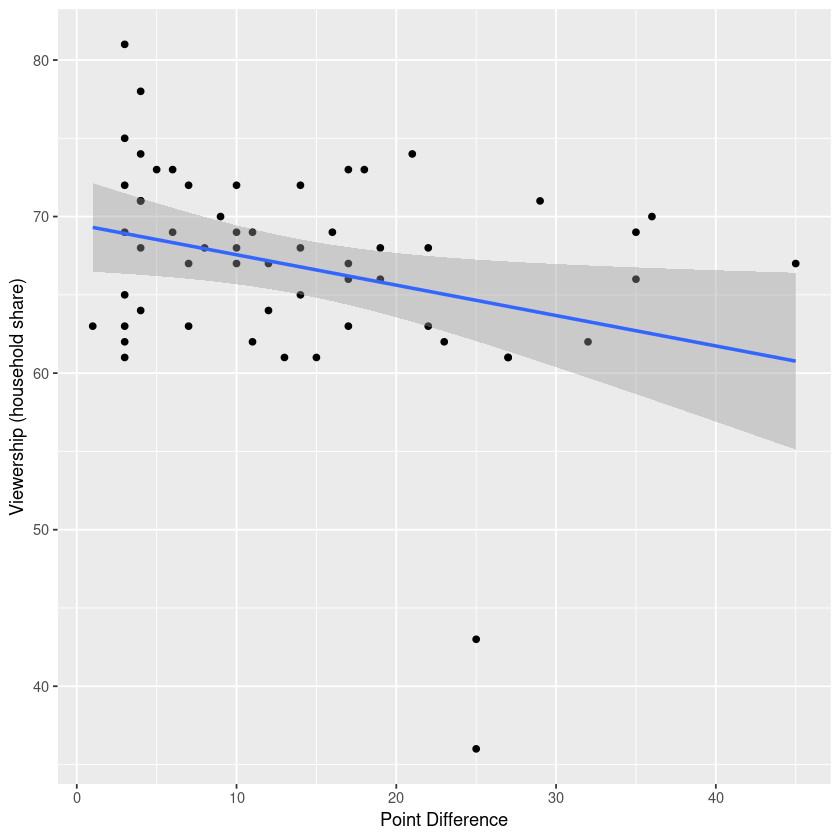

In [7]:
# Display the closest game and largest point difference
super_bowls  %>% 
 filter(difference_pts == min(difference_pts) | difference_pts == max(difference_pts))

games_tv <- tv  %>% inner_join(super_bowls, by = "super_bowl")

ggplot(games_tv, aes(difference_pts, share_household)) +
 geom_point() +
 geom_smooth(method = "lm") +
 labs(x = "Point Difference", y = "Viewership (household share)")

In [8]:
score_impact = "weak"
score_impact

[1] "weak"

- How has the number of viewers and TV ratings trended alongside advertisement costs? Which one increases first? Visualize and interpret the data, storing your string answer to `first_to_increase` (either "viewers", "ratings", or "ads").

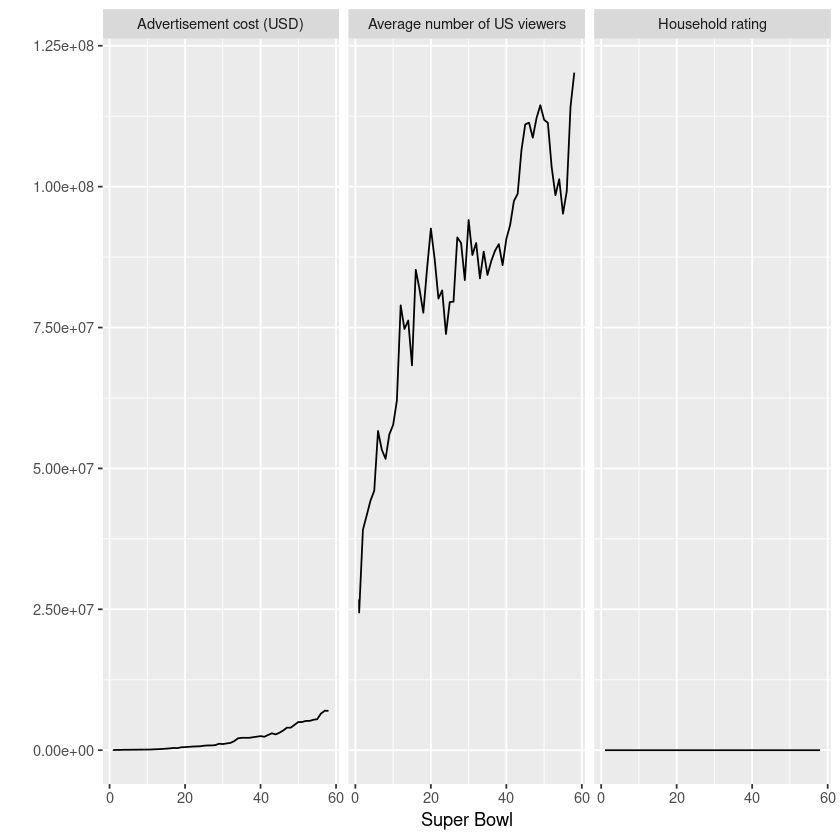

In [9]:
games_tv_plot_avg_us_viewers <- games_tv %>%
    select(super_bowl, avg_us_viewers) %>%
    mutate(category = "Average number of US viewers", value = avg_us_viewers) %>%
    select(super_bowl, category, value)

games_tv_plot_rating_household <- games_tv %>%
    select(super_bowl, rating_household) %>%
    mutate(category = "Household rating", value = rating_household) %>%
    select(super_bowl, category, value)

games_tv_plot_ad_cost <- games_tv %>%
    select(super_bowl, ad_cost) %>%
    mutate(category = "Advertisement cost (USD)", value = ad_cost) %>%
    select(super_bowl, category, value)

games_tv_plot <- bind_rows(games_tv_plot_avg_us_viewers, 
                           games_tv_plot_rating_household, 
                           games_tv_plot_ad_cost)

ggplot(games_tv_plot, aes(super_bowl, value)) +
 geom_line() +
 facet_wrap(~ category) + 
 labs(x = "Super Bowl", y = "")

In [10]:
first_to_increase = "viewers"
first_to_increase

[1] "viewers"